In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy import stats

Let's open up the CSV file for all female fighters and browse through the columns and datatypes for each of them to get an idea of what we are dealing with. 

In [2]:
fighter_data = pd.read_csv('fighter.csv', sep=';')
fighter_data

,fighter_name,Height(cm),Weight(kg),Reach,Stance,Age,SLpM,Str_Acc(%),SApM,Str_Def(%),TD_Avg,TD_Acc(%),TD_Def(%),Sub_Avg
0,Mariya Agapova,1.71,56.7,"68""",Southpaw,26,3.70,0.50,4.15,0.47,1.23,0.66,0.33,0.6
1,Jessica Aguilar,1.62,52.2,"63""",Orthodox,41,4.93,0.50,7.19,0.53,0.94,0.25,0.50,0.2
2,Aleksandra Albu,1.58,52.2,"63""",Orthodox,32,4.83,0.47,5.56,0.38,2.27,0.50,0.77,0.4
3,Irene Aldana,1.80,61.2,"68""",Orthodox,35,5.52,0.38,5.97,0.61,0.23,0.50,0.84,0.1
4,JJ Aldrich,1.68,56.7,"67""",Southpaw,30,3.76,0.41,4.55,0.61,0.80,0.40,0.57,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,Yan Xiaonan,1.68,52.2,"63""",Orthodox,34,6.42,0.42,3.63,0.63,1.00,0.75,0.75,0.0
181,Ashley Yoder,1.74,52.2,"69""",Southpaw,35,2.75,0.39,3.53,0.46,1.33,0.37,0.68,0.7
182,Shanna Young,1.74,61.2,"65""",Orthodox,32,3.05,0.57,5.28,0.45,0.00,0.00,0.54,0.0
183,Zhang Weili,1.65,52.2,"63""",Switch,33,6.38,0.45,4.43,0.53,1.26,0.23,1.00,0.5


In [3]:
list(fighter_data.columns)

['fighter_name',
 'Height(cm)',
 'Weight(kg)',
 'Reach',
 'Stance',
 'Age',
 'SLpM',
 'Str_Acc(%)',
 'SApM',
 'Str_Def(%)',
 'TD_Avg',
 'TD_Acc(%)',
 'TD_Def(%)',
 'Sub_Avg']

In [4]:
fighter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fighter_name  185 non-null    object 
 1   Height(cm)    185 non-null    float64
 2   Weight(kg)    185 non-null    float64
 3   Reach         162 non-null    object 
 4   Stance        177 non-null    object 
 5   Age           185 non-null    int64  
 6   SLpM          185 non-null    float64
 7   Str_Acc(%)    185 non-null    float64
 8   SApM          185 non-null    float64
 9   Str_Def(%)    185 non-null    float64
 10  TD_Avg        185 non-null    float64
 11  TD_Acc(%)     185 non-null    float64
 12  TD_Def(%)     185 non-null    float64
 13  Sub_Avg       185 non-null    float64
dtypes: float64(10), int64(1), object(3)
memory usage: 20.4+ KB


Jumping into basic data exploration by looking at the descriptive statistics and distribution of Height, Weight and Age. We can also use the Shapiro-Wilk test to test for normality. 

In [5]:
fighter_data['Height(cm)'].describe()

count    185.000000
mean       1.680541
std        0.067209
min        1.520000
25%        1.650000
50%        1.680000
75%        1.740000
max        1.860000
Name: Height(cm), dtype: float64

<Axes: xlabel='Height(cm)', ylabel='count'>

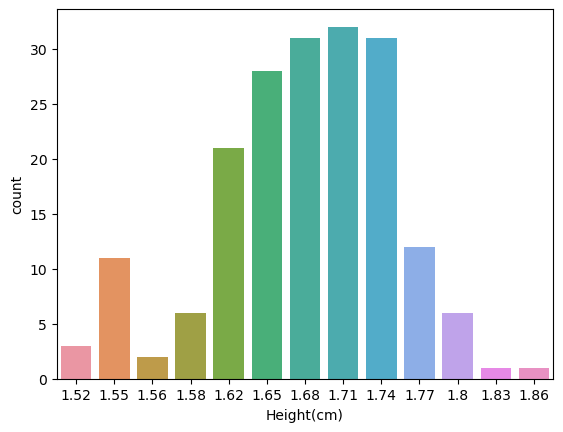

In [6]:
sns.countplot(x=fighter_data['Height(cm)'], data=fighter_data)

In [7]:
stat, p = stats.shapiro(fighter_data['Height(cm)'])
print('%0.20f' % p)

0.00025114652817137539


Normality test:
Since p < 0.05, we reject the null hypothesis, which means the data is not normally distributed. 

In [8]:
fighter_data['Weight(kg)'].describe()

count    185.000000
mean      56.728649
std        4.086083
min       52.200000
25%       52.200000
50%       56.700000
75%       61.200000
max       65.800000
Name: Weight(kg), dtype: float64

<Axes: xlabel='Weight(kg)', ylabel='count'>

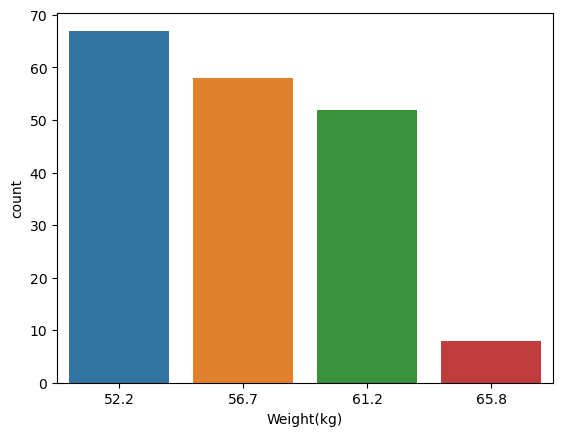

In [9]:
sns.countplot(x=fighter_data['Weight(kg)'], data=fighter_data)

In [10]:
fighter_data['Weight(kg)'].unique()

array([56.7, 52.2, 61.2, 65.8])

In [11]:
fighter_data['Weight(kg)'].value_counts()

52.2    67
56.7    58
61.2    52
65.8     8
Name: Weight(kg), dtype: int64

We notice that the 'weight' column might not be displaying the actual weight of each fighters but the weightclasses that they are in. There are 4 UFC weight classes for women. 

Featherweight: 61.2(min); 65.8(max)
Bantamweight: 56.7(min); 61.2(max)
Flyweight: 52.2(min); 56.7(max)
Strawweight: no requirement; 52.2(max)

There is definitely more of an advantage if someone is closer the the max limit in a weightclass so we can assume that most of the fighters' weight must be close to the higher limit. We will be using this assumption to conduct a more detailed data analysis later. 

In [12]:
fighter_data.Age.describe()

count    185.000000
mean      33.848649
std        4.669374
min       23.000000
25%       31.000000
50%       34.000000
75%       37.000000
max       46.000000
Name: Age, dtype: float64

<Axes: xlabel='Age', ylabel='count'>

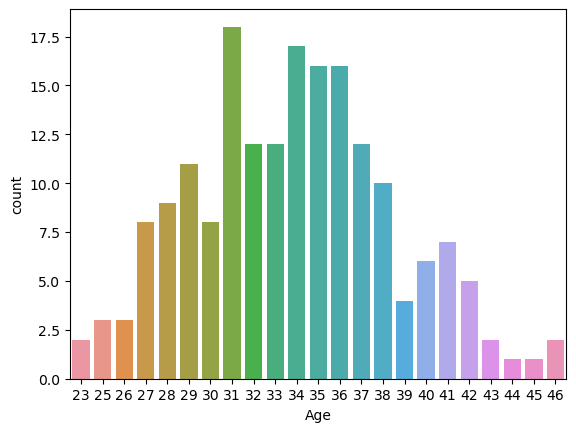

In [13]:
sns.countplot(x=fighter_data['Age'], data=fighter_data)

In [14]:
stat, p = stats.shapiro(fighter_data['Age'])
print('%0.20f' % p)

0.20167396962642669678


Normality test:
Since p > 0.05, we fail to reject the null hypothesis, which means that the data is normally distributed. 

For the next part of the data analysis, I want to compare the fighters' statistics by putting them into different weight classes. 

After noticing the the pattern on the 'Weight(kg)' column, we can leverage that to split the fighters up. 

Featherweight: 61.2(min); 65.8(max)
Bantamweight: 56.7(min); 61.2(max)
Flyweight: 52.2(min); 56.7(max)
Strawweight: no requirement; 52.2(max)

In [17]:
def format_weightclass(row):
    if row['Weight(kg)'] == 52.2:
        return 'Strawweight'
    elif row['Weight(kg)'] == 56.7:
        return 'Flyweight'
    elif row['Weight(kg)'] == 61.2:
        return 'Bantamweight'
    else:
        return 'Featherweight'

fighter_data['Weightclass'] = fighter_data.apply(lambda row: format_weightclass(row), axis=1)

In [18]:
fighter_data

,fighter_name,Height(cm),Weight(kg),Reach,Stance,Age,SLpM,Str_Acc(%),SApM,Str_Def(%),TD_Avg,TD_Acc(%),TD_Def(%),Sub_Avg,Weightclass
0,Mariya Agapova,1.71,56.7,"68""",Southpaw,26,3.70,0.50,4.15,0.47,1.23,0.66,0.33,0.6,Flyweight
1,Jessica Aguilar,1.62,52.2,"63""",Orthodox,41,4.93,0.50,7.19,0.53,0.94,0.25,0.50,0.2,Strawweight
2,Aleksandra Albu,1.58,52.2,"63""",Orthodox,32,4.83,0.47,5.56,0.38,2.27,0.50,0.77,0.4,Strawweight
3,Irene Aldana,1.80,61.2,"68""",Orthodox,35,5.52,0.38,5.97,0.61,0.23,0.50,0.84,0.1,Bantamweight
4,JJ Aldrich,1.68,56.7,"67""",Southpaw,30,3.76,0.41,4.55,0.61,0.80,0.40,0.57,0.0,Flyweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,Yan Xiaonan,1.68,52.2,"63""",Orthodox,34,6.42,0.42,3.63,0.63,1.00,0.75,0.75,0.0,Strawweight
181,Ashley Yoder,1.74,52.2,"69""",Southpaw,35,2.75,0.39,3.53,0.46,1.33,0.37,0.68,0.7,Strawweight
182,Shanna Young,1.74,61.2,"65""",Orthodox,32,3.05,0.57,5.28,0.45,0.00,0.00,0.54,0.0,Bantamweight
183,Zhang Weili,1.65,52.2,"63""",Switch,33,6.38,0.45,4.43,0.53,1.26,0.23,1.00,0.5,Strawweight


In [21]:
fighter_data[fighter_data['Weightclass'] == 'Featherweight'].describe()
fighter_data[fighter_data['Weightclass'] == 'Bantamweight'].describe()
fighter_data[fighter_data['Weightclass'] == 'Flyweight'].describe()
fighter_data[fighter_data['Weightclass'] == 'Strawweight'].describe()

,Height(cm),Weight(kg),Age,SLpM,Str_Acc(%),SApM,Str_Def(%),TD_Avg,TD_Acc(%),TD_Def(%),Sub_Avg
count,67.000000,6.700000e+01,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,1.632836,5.220000e+01,34.044776,3.662239,0.445373,4.144627,0.535821,1.369851,0.371343,0.545821,0.555224
std,0.060922,5.727243e-14,4.775039,1.407653,0.097907,1.679843,0.077950,1.316175,0.279642,0.283641,0.678966
min,1.520000,5.220000e+01,23.000000,1.000000,0.200000,1.200000,0.320000,0.000000,0.000000,0.000000,0.000000
25%,1.580000,5.220000e+01,31.000000,2.650000,0.385000,3.080000,0.500000,0.335000,0.200000,0.355000,0.000000
50%,1.650000,5.220000e+01,34.000000,3.580000,0.440000,3.810000,0.540000,1.040000,0.330000,0.600000,0.300000
75%,1.680000,5.220000e+01,37.000000,4.660000,0.500000,5.040000,0.580000,1.990000,0.500000,0.750000,0.750000
max,1.770000,5.220000e+01,46.000000,6.420000,0.710000,10.400000,0.710000,6.470000,1.000000,1.000000,3.400000


Since we have looked at Height, Weight and Age, we will be excluding them and explore only the fights statistics. 

In [22]:
mod = ['SLpM', 'Str_Acc(%)', 'SApM', 'Str_Def(%)', 'TD_Avg', 'TD_Acc(%)', 'TD_Def(%)', 'Sub_Avg','Weightclass']
f_mod = fighter_data[mod]
f_mod

,SLpM,Str_Acc(%),SApM,Str_Def(%),TD_Avg,TD_Acc(%),TD_Def(%),Sub_Avg,Weightclass
0,3.70,0.50,4.15,0.47,1.23,0.66,0.33,0.6,Flyweight
1,4.93,0.50,7.19,0.53,0.94,0.25,0.50,0.2,Strawweight
2,4.83,0.47,5.56,0.38,2.27,0.50,0.77,0.4,Strawweight
3,5.52,0.38,5.97,0.61,0.23,0.50,0.84,0.1,Bantamweight
4,3.76,0.41,4.55,0.61,0.80,0.40,0.57,0.0,Flyweight
...,...,...,...,...,...,...,...,...,...
180,6.42,0.42,3.63,0.63,1.00,0.75,0.75,0.0,Strawweight
181,2.75,0.39,3.53,0.46,1.33,0.37,0.68,0.7,Strawweight
182,3.05,0.57,5.28,0.45,0.00,0.00,0.54,0.0,Bantamweight
183,6.38,0.45,4.43,0.53,1.26,0.23,1.00,0.5,Strawweight


In [23]:
f_mod.groupby('Weightclass').agg([np.mean, np.std])

SLpM           Str_Acc(%)                SApM            \
                   mean       std       mean       std      mean       std   
Weightclass                                                                  
Bantamweight   3.586731  1.675565   0.425000  0.094215  4.092885  1.601811   
Featherweight  3.998750  1.996736   0.473750  0.071502  3.547500  1.724684   
Flyweight      4.106897  1.464596   0.437586  0.091753  3.814828  1.281899   
Strawweight    3.662239  1.407653   0.445373  0.097907  4.144627  1.679843   

              Str_Def(%)              TD_Avg           TD_Acc(%)            \
                    mean       std      mean       std      mean       std   
Weightclass                                                                  
Bantamweight    0.525385  0.088061  1.264615  1.348340  0.299808  0.230953   
Featherweight   0.528750  0.132281  1.691250  2.191851  0.335000  0.277900   
Flyweight       0.566897  0.084235  1.294828  1.502798  0.372586  0.271536   
Strawweight     0.535821  0.077950  1.369851  1.316175  0.371343  0.279642   

              TD_Def(%)             Sub_Avg            
                   mean       std      mean       std  
Weightclass                                            
Bantamweight   0.569615  0.232142  0.482692  0.786085  
Featherweight  0.546250  0.364297  0.362500  0.358319  
Flyweight      0.468103  0.300178  0.529310  0.624923  
Strawweight    0.545821  0.283641  0.555224  0.678966

Let's explore if the mean values obtained are equal by conducting a one-way ANOVA test. 
If we want to do individual comparison, we can also perform individual T-test. 

In [24]:
# Example data for three categories
feather = f_mod[f_mod['Weightclass'] == 'Featherweight']
bantam = f_mod[f_mod['Weightclass'] == 'Bantamweight']
fly = f_mod[f_mod['Weightclass'] == 'Flyweight']
straw = f_mod[f_mod['Weightclass'] == 'Strawweight']

mod_2 = ['SLpM', 'Str_Acc(%)', 'SApM', 'Str_Def(%)', 'TD_Avg', 'TD_Acc(%)', 'TD_Def(%)', 'Sub_Avg']

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(feather[mod_2], bantam[mod_2], fly[mod_2], straw[mod_2])

print("One-way ANOVA results:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)


One-way ANOVA results:
F-statistic: [1.33867908 0.85280467 0.76561458 2.47312008 0.23590353 0.92190972
 1.37586842 0.25416606]
p-value: [0.26329927 0.46676882 0.51469365 0.06317037 0.87125548 0.43140133
 0.2516504  0.85829658]


It seems like all of the p-value obtained are larger than 0.05, we fail to reject the null hypothesis, which means that they are all equal. 

In [25]:
# Perform independent t-tests
t_statistic, p_value = stats.ttest_ind(feather[mod_2], bantam[mod_2])
print("\nIndependent t-test (Feather vs Bantam):")
print("t-statistic:", t_statistic)
print("p-value:", p_value)


Independent t-test (Feather vs Bantam):
t-statistic: [ 0.63166619  1.39872691 -0.88802963  0.09376987  0.76112492  0.39080865
 -0.24433671 -0.42335134]
p-value: [0.5300869  0.16721963 0.37819278 0.92561514 0.44966601 0.69737054
 0.80783236 0.67360471]


There are 12 different combinations that we can perform the independent t-tests on but for demonstration purposes, we will be using featherweight and bantamweight as an example. 

Even when doing individual comparison, the result is similar to the ANOVA test. All the p-values are larger than 0.05, we fail to reject the null hypothesis, which indicates the averages are equal. 

Let's plot a heatmap to study if the variables are strongly correlated with each other. 

/var/folders/mg/9c8_3q293sgg37fxt_551_tm0000gn/T/ipykernel_4119/1932592724.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = fighter_data.corr().abs()


Weight(kg)  Height(cm)    0.554162
TD_Avg      Str_Acc(%)    0.344878
SApM        SLpM          0.328329
            TD_Avg        0.325231
Str_Acc(%)  SLpM          0.322729
SApM        TD_Acc(%)     0.315302
SLpM        TD_Def(%)     0.301025
Str_Acc(%)  TD_Acc(%)     0.291085
Sub_Avg     TD_Avg        0.271491
SApM        Str_Def(%)    0.262638
dtype: float64


<Axes: >

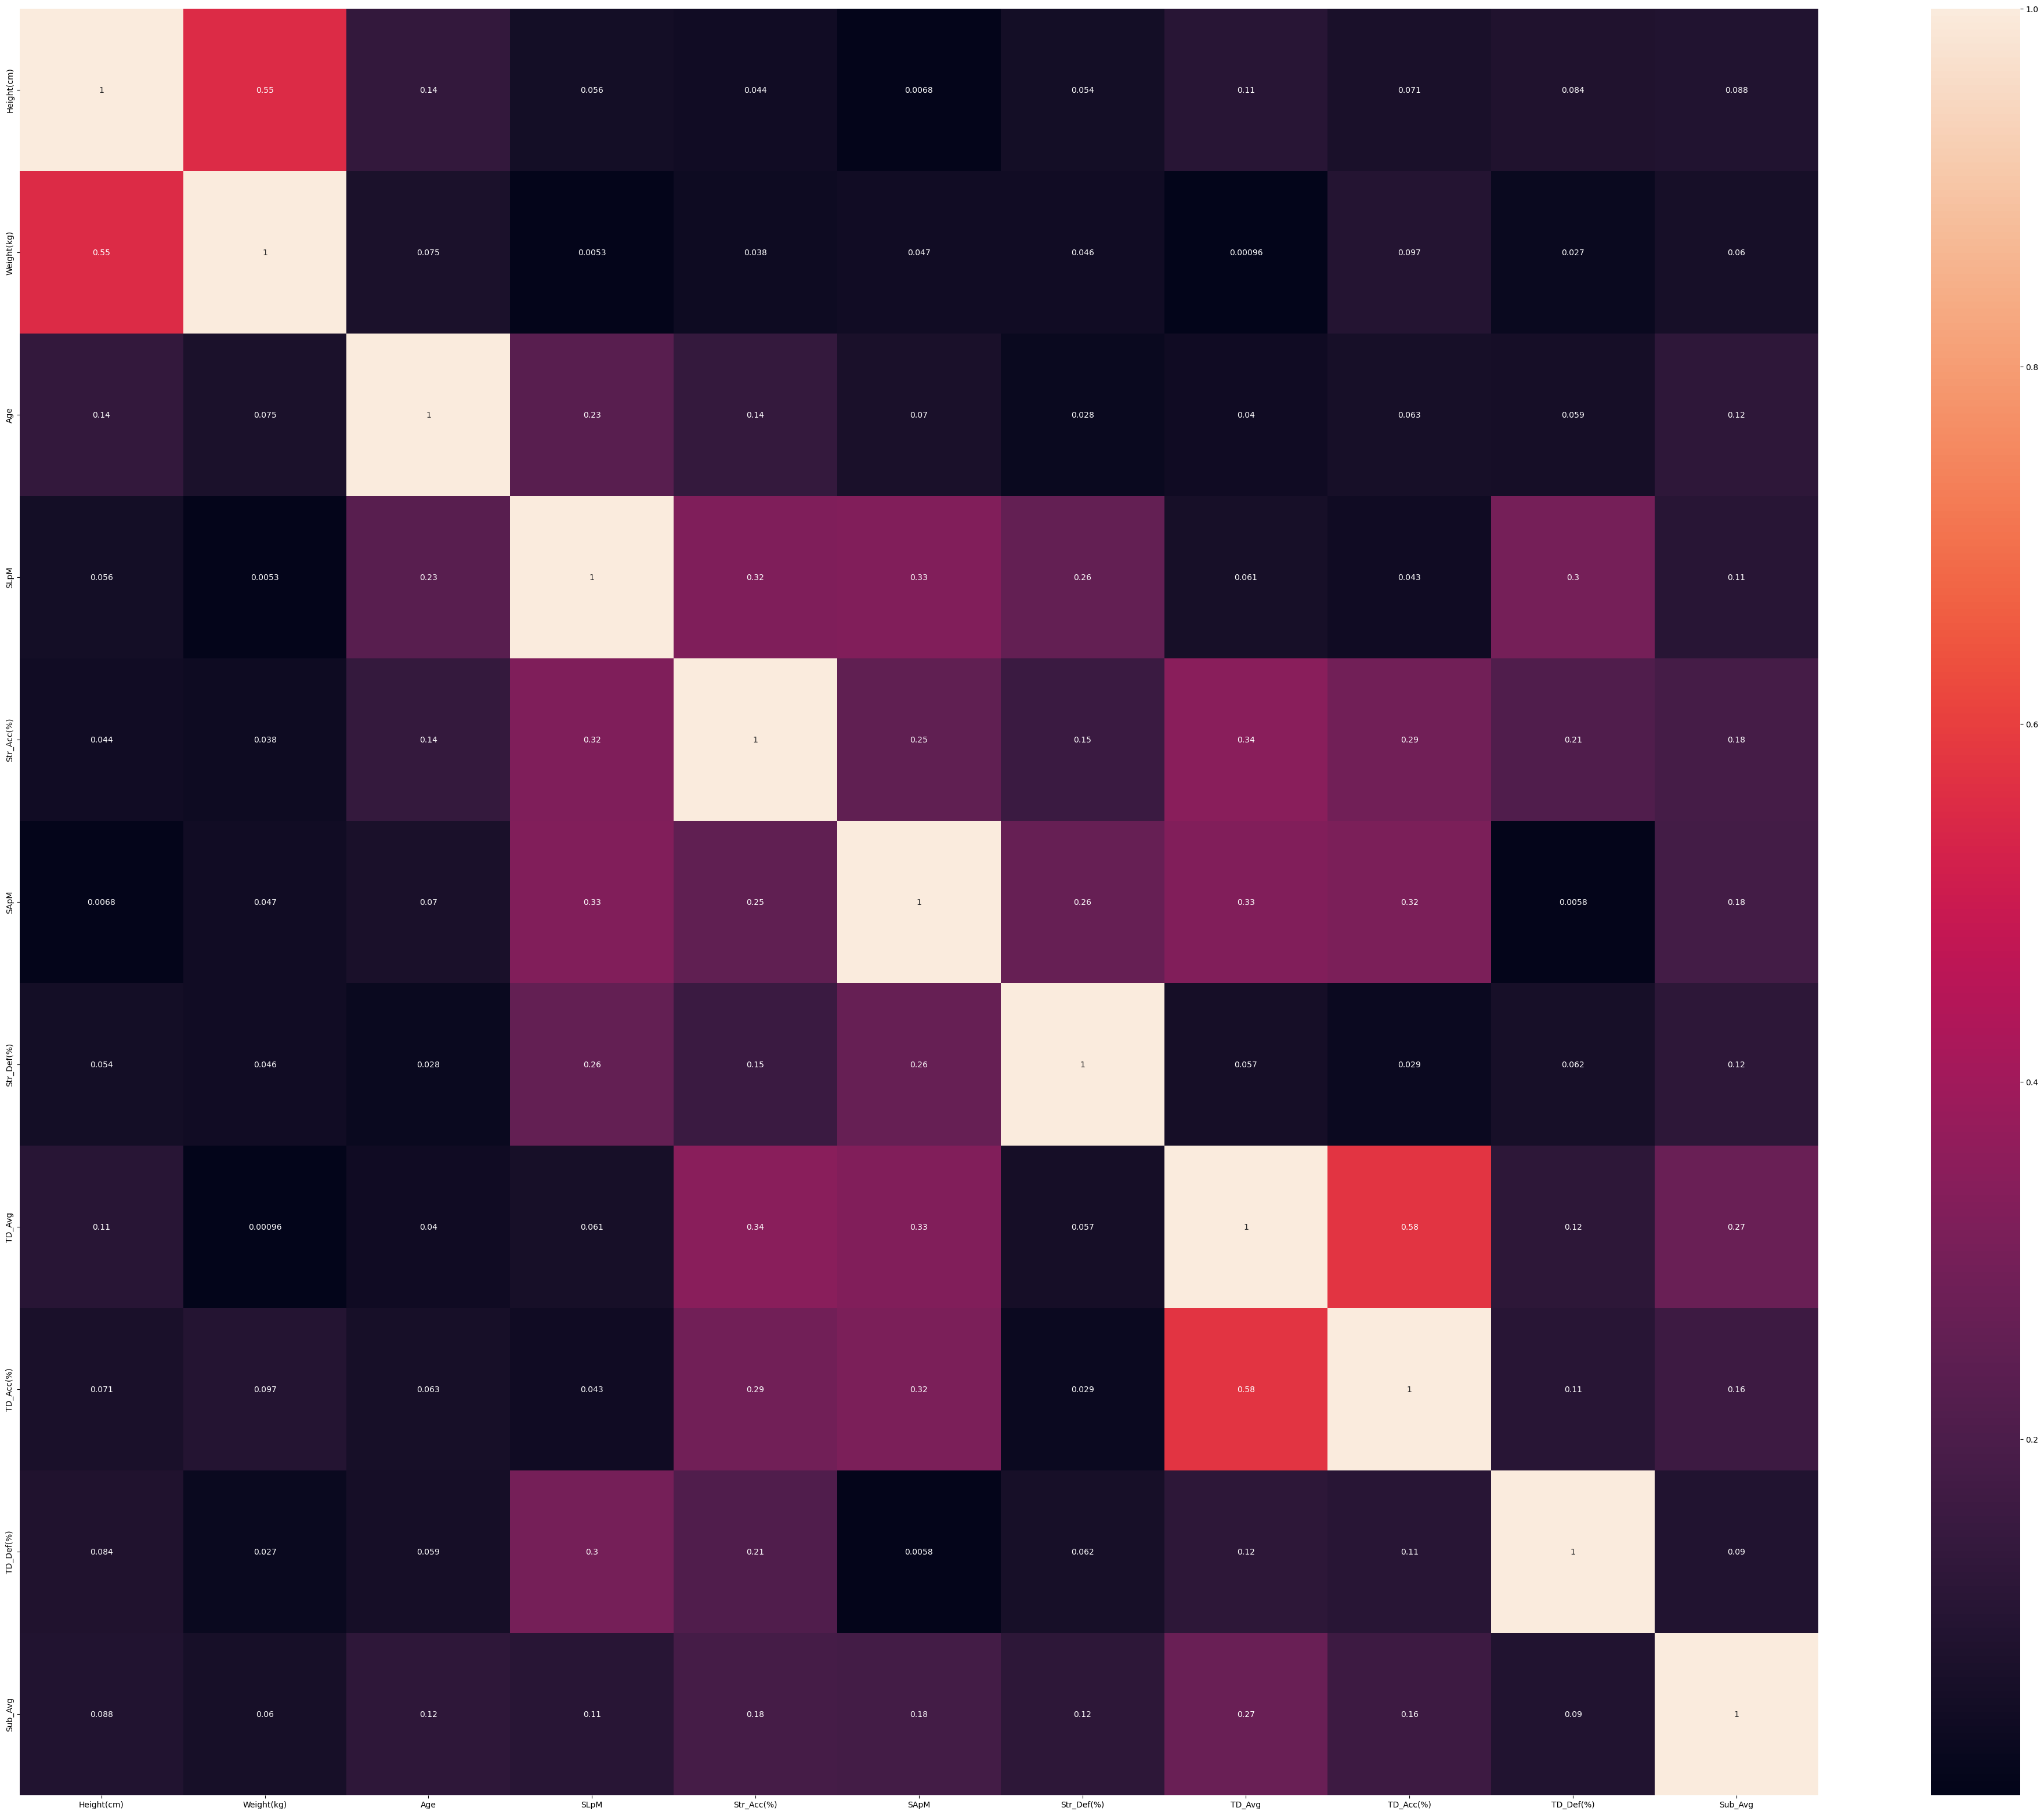

In [26]:
# Calculate correlation matrix for all variables in raw dataset
corr_matrix = fighter_data.corr().abs()

# Unpack matrix and convert to list of pairs of variables that can be sorted and iterated over
correlations = corr_matrix.stack().sort_values(ascending=False)
correlations = correlations.iloc[fighter_data.shape[1]-1::2]

# Print the ten largest correlations
print(correlations.head(10))

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(50, 40))
sns.heatmap(corr_matrix, annot=True)

SLpM - Significant Strikes Landed per Minute
Str. Acc. - Significant Striking Accuracy
SApM - Significant Strikes Absorbed per Minute
Str. Def. - Significant Strike Defence (the % of opponents strikes that did not land)
TD Avg. - Average Takedowns Landed per 15 minutes
TD Acc. - Takedown Accuracy
TD Def. - Takedown Defense (the % of opponents TD attempts that did not land)
Sub. Avg. - Average Submissions Attempted per 15 minutes

The printed correlations do not suggest that the variables are strongly correlated. The data provides only a brief overview of the fighters' performances. There are a lot more other factors that come into play during a fight. Boiling down to only look at 8 different variables to determine if a fighter is doing well is inaccurate. In order to make more accurate predictions, we need to collect more data and that brings us to the next CSV file. We are diving deeper into looking at individual fight statistics which will provide us with more variables to experiment with. 